# Data preprocessing

**Requirement**: take the dataset of your project, *with* the missing values and the newly created variables.

In [125]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("../pokemon.csv")

In [126]:
# My target is survived 
y = df.is_legendary.values
# For demonstration, I'm taking only 4 columns
categorical_variables = ["type1", "type2"]
quantitative_variables = ['defense', 'experience_growth', 'height_m', 'hp',
       'percentage_male']

X = df[categorical_variables + quantitative_variables].values
X_quantitative = df[quantitative_variables].values
X_categorical = df[categorical_variables].values

## Encoding categorical variables

#### One-hot encoding
For most ML algorithms, the categorical variables should be encoded using one-hot encoding. To do so, we can use `sklearn` one-hot-encoding class.

In [127]:
from sklearn.preprocessing import OneHotEncoder

In [128]:
one_hot_encoder = OneHotEncoder()

In [129]:
one_hot_encoder.fit(X_categorical)
one_hot_encoded_X = one_hot_encoder.transform(X_categorical)

`encoded_X` is returned as the sparse representation of the matrix, that has to be accessed with `toarray()`.

In [130]:
one_hot_encoded_X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
one_hot_encoder.get_feature_names_out()

array(['x0_bug', 'x0_dark', 'x0_dragon', 'x0_electric', 'x0_fairy',
       'x0_fighting', 'x0_fire', 'x0_flying', 'x0_ghost', 'x0_grass',
       'x0_ground', 'x0_ice', 'x0_normal', 'x0_poison', 'x0_psychic',
       'x0_rock', 'x0_steel', 'x0_water', 'x1_bug', 'x1_dark',
       'x1_dragon', 'x1_electric', 'x1_fairy', 'x1_fighting', 'x1_fire',
       'x1_flying', 'x1_ghost', 'x1_grass', 'x1_ground', 'x1_ice',
       'x1_normal', 'x1_poison', 'x1_psychic', 'x1_rock', 'x1_steel',
       'x1_water', 'x1_nan'], dtype=object)

In [132]:
one_hot_encoded_X

<801x37 sparse matrix of type '<class 'numpy.float64'>'
	with 1602 stored elements in Compressed Sparse Row format>

**Questions**:
1. What ML algorithm requires one-hot encoding ?
2. Why do you think the matrix is stored as its sparse representation ?
3. Apply one-hot encoding to every categorical variables in your dataset and show how many new columns have been generated.
4. How does the one hot encoder behaves with missing values ?
5. Merge new array with the remaining quantitative variables to create `X_encoded`.

#### Ordinal encoding
Another way to encode categorical variables is through integer labels (**not recommended BUT sklearn requires it for some algorithms**). The class to do so is `LabelEncoder`.
It needs to be applied on a **per array basis** and then concatenated.

In [139]:
from sklearn.preprocessing import LabelEncoder

In [140]:
label_encoder = LabelEncoder()

In [141]:
encoded_vars = []
for categorical_var in X_categorical.T:
    encoded_vars.append(label_encoder.fit_transform(categorical_var))
    print(f"===== Encoded classes: {label_encoder.classes_}")

===== Encoded classes: ['bug' 'dark' 'dragon' 'electric' 'fairy' 'fighting' 'fire' 'flying'
 'ghost' 'grass' 'ground' 'ice' 'normal' 'poison' 'psychic' 'rock' 'steel'
 'water']
===== Encoded classes: ['bug' 'dark' 'dragon' 'electric' 'fairy' 'fighting' 'fire' 'flying'
 'ghost' 'grass' 'ground' 'ice' 'normal' 'poison' 'psychic' 'rock' 'steel'
 'water' nan]


In [142]:
X_categorical = np.array(encoded_vars).T

In [143]:
X_categorical

array([[ 9, 13],
       [ 9, 13],
       [ 9, 13],
       ...,
       [ 1,  2],
       [14, 18],
       [16,  4]])

**Questions**:
1. Apply the label encoder to every categorical variables in your dataset.
2. Concatenate the categorical variables together into a numpy array `X_labelled_categories`.
3. Concatenate `X_labelled_categories` to your other quantitative data.

**1**. Le LabelEncoder permet d'étiquetter chaque catégorie en lui mettant un nombre entier incrémental.

*Dans quel cas est-ce souhaitable ?* 
- Pour les variables ordinales
- */!\* il ne faut pas les confondre avec des variables ordinales !!!!

## Imputing missing values
*See more at*: https://scikit-learn.org/stable/modules/impute.html

During class, we studied 2 main ways of dealing with missing values: static imputation and KNN imputation.

### Static imputation
Previously, we used the `fillna` method of pandas.
We can also use the class `SimpleImputer`.

The idea behind sklearn processers are the same than classifiers:
1. Call `fit` to "train" the preprocesser
2. Call `transform` to 
(or call `fit_transform` to do both at the same time).

In [149]:
from sklearn.impute import SimpleImputer

In [150]:
simple_imputer = SimpleImputer(strategy="mean")
simple_imputer.fit(X_quantitative)

X_imputed = simple_imputer.transform(X_quantitative)

In [151]:
X_imputed

array([[4.9000000e+01, 1.0598600e+06, 7.0000000e-01, 4.5000000e+01,
        8.8100000e+01],
       [6.3000000e+01, 1.0598600e+06, 1.0000000e+00, 6.0000000e+01,
        8.8100000e+01],
       [1.2300000e+02, 1.0598600e+06, 2.0000000e+00, 8.0000000e+01,
        8.8100000e+01],
       ...,
       [5.3000000e+01, 1.2500000e+06, 5.5000000e+00, 2.2300000e+02,
        5.5155761e+01],
       [1.0100000e+02, 1.2500000e+06, 2.4000000e+00, 9.7000000e+01,
        5.5155761e+01],
       [1.1500000e+02, 1.2500000e+06, 1.0000000e+00, 8.0000000e+01,
        5.5155761e+01]])

**Questions**:
1. Use static imputation with mean and median for quantitative variables.
2. Compute statistical estimators of the variables and show how filling N/A affects the distribution.
3. Performs the same analysis using a plot.
4. Try doing the same with qualitative variables... what is the problem ? Perform the imputation using the `most_frequent` strategy either on labeled data or one-hot-encoded data.

### KNN imputation
Another possibility is to use the `KNNImputer`, that uses only KNN.

In [160]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(X_quantitative)

KNNImputer()

**Questions**:
1. Use KNN imputation with $k=1$, $k=5$ and $k=1000$. 
2. How does the value of $k$ impact your imputation ? Analyze it using statistical estimators and graph.
3. Try doing the same with qualitative variables... what is the problem ? How can you resolve it ?

Now, save your dataset as `X_preprocessed` and use it in the rest of the labs/in your project.

## Feature transformation

In class, we saw two possible ways of reducing features:
- Min-max scaling
- Z-scaling/Standard-scaling

Many scalers are available in sklearn: https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler

In [165]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_quantitative)
scaled_quantitative = min_max_scaler.transform(X_quantitative)

# Autre manière de calculer la matrice transformée:
# scaled_quantitative = min_max_scaler.fit_transform(X_quantitative)

Text(0.5, 1.0, 'Yellow = legendary, Purple = non legendary')

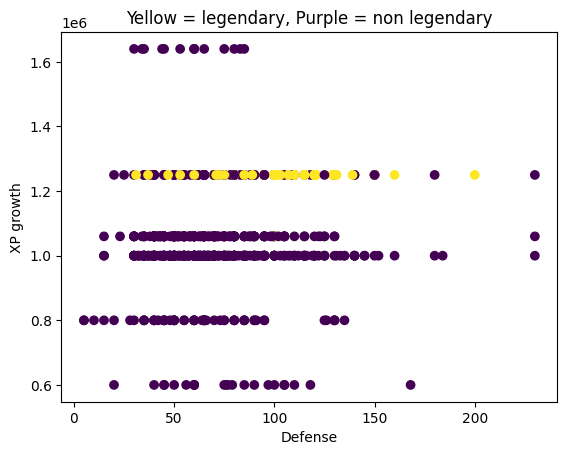

In [166]:
plt.scatter(X_quantitative[:,0], X_quantitative[:,1], c=y)
plt.xlabel("Defense")
plt.ylabel("XP growth")
plt.title("Yellow = legendary, Purple = non legendary")

Text(0.5, 1.0, 'Yellow = legendary, Purple = non legendary')

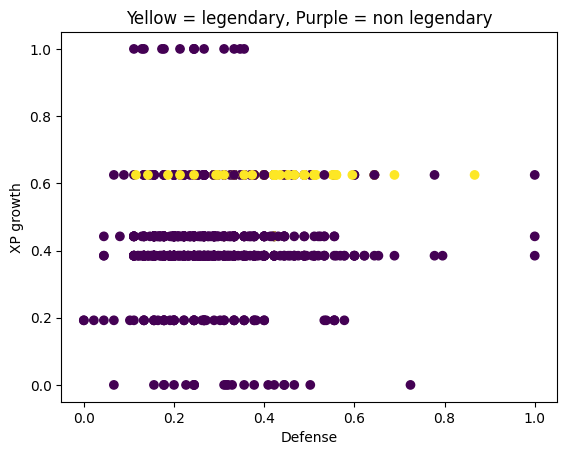

In [167]:
plt.scatter(scaled_quantitative[:,0], scaled_quantitative[:,1], c=y)
plt.xlabel("Defense")
plt.ylabel("XP growth")
plt.title("Yellow = legendary, Purple = non legendary")

**Questions**:
1. Can you apply every kind of scaling to every kind of algorithm ?
2. Apply min max scaling to your dataset and compare the repartition of the data on the parametric space.
2. Go back to the full pipeline and perform train/test validation with and without scaling and see how it affects the results (**be careful about data leaks**).

## Pipeline globale:

In [173]:
# Analyse de données et compréhension des variables et de la problématique (cf: partiel)
# Et choix d'un score pertinent

# Etape 1: Preprocessing

    # Transformer les variables qualitatives en "quantitative" 
        # Si jamais mon algorithme ne le prend pas nativement en compte, faire des variables dummy
        # Si jamais l'implémentation de sklearn a besoin d'entier, utiliser le label encoder.
        
    # Gérer les données manquantes:
        # Faire un bilan
        # Choisir une méthode d'imputation en la justifiant
    
    # Trouver les valeurs aberrantes:
        # Les analyser
        # Soit les traiter comme des valeurs manquantes
        # Soit les laisser
        

##### Fin de l'étape 1: un jeu de données propre !

# Etape 2: Classification
    # Faire un choix du classifieur que l'on souhaite utiliser (chacun ayant ses contraintes)
    
    # Faire un choix de la transformation des données qu'on va appliquer
    
    # Entraîner l'algorithme avec une approche soit:
        # train - test (si imposée par les contraintes externes)
        # validation croisée
    # pour trouver les hyperparamètres optimaux
    
    # Une fois sélectionnés, on fait l'entraînement sur tout le jeu de données et on sort le score final
    

In [174]:
from sklearn.preprocessing import OneHotEncoder

# On transforme les variables qualitatives en dummy (numérique)
one_hot_encoder = OneHotEncoder()
X_qualitative_dummy = one_hot_encoder.fit_transform(X_categorical)
X_all = np.concatenate([X_quantitative, X_qualitative_dummy.toarray()], axis=1)

# On part sur un KNNImputer, car nous avons montré dans la partie 2 que celui-ci est relativement
# efficace 
# On prend k=1 car nous avons des variables qualitatives

from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=1)
X_all_imputed = knn_imputer.fit_transform(X_all)

# Regarder les valeurs aberrantes grâce à mes boxplots

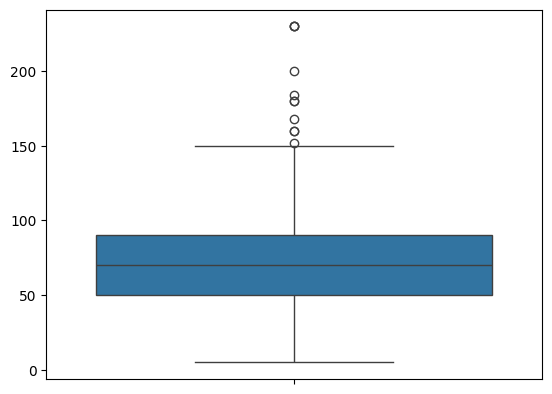

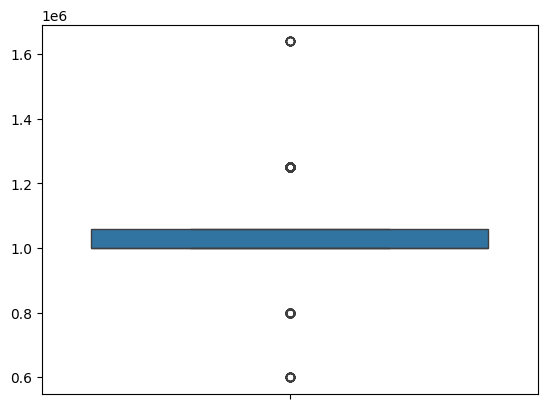

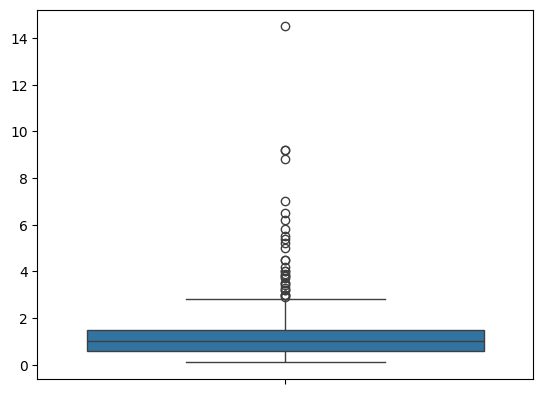

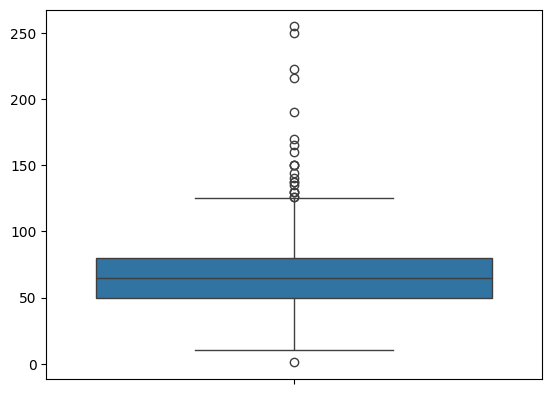

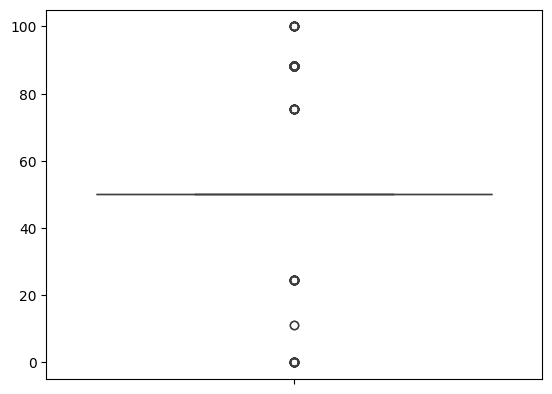

In [175]:
for X_val in X_quantitative.T:
    sns.boxplot(X_val)
    plt.show()
    
# Après l'examen des boxplots, je ne vois pas de valeur aberrantes: il y a certes des passagers beaucoup plus âgés que 
# la répartition médiane, mais cela est porteur de sens pour la classification.
# Idem pour le prix des billets: il n'est pas choquant qu'un bateau de luxe offre des billets extrêmement chers
# et certains beaucoup moins.

In [176]:
# Jeu de donnée propre à la fin de mon étape 1:
X_preprocessed = X_all_imputed

In [177]:
# On choisit d'appliquer un KNN mais il nous faut décider du k.
# On veut aussi savoir si jamais il est intéressant de scaler les données (car algorithme basé sur la distance).
# On choisit une approche de validation croisée.

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# Sans scaling
for k in range(1, 30, 2):
    print(f"k = {k}")
    knn_classifier = KNeighborsClassifier(n_neighbors=k, p=1)
    scores = cross_val_score(estimator=knn_classifier, X=X_preprocessed, y=y, scoring="accuracy")
    print(f"Model score: {round(np.median(scores)*100, 2)}%")


k = 1
Model score: 91.25%
k = 3
Model score: 92.55%
k = 5
Model score: 93.75%
k = 7
Model score: 93.12%
k = 9
Model score: 93.75%
k = 11
Model score: 92.5%
k = 13
Model score: 92.55%
k = 15
Model score: 92.5%
k = 17
Model score: 92.5%
k = 19
Model score: 92.5%
k = 21
Model score: 92.5%
k = 23
Model score: 91.88%
k = 25
Model score: 91.88%
k = 27
Model score: 91.88%
k = 29
Model score: 91.88%


In [179]:
# Avec scaling
from sklearn.metrics import balanced_accuracy_score
NBR_FOLDS=5

indexes = KFold(n_splits=NBR_FOLDS, shuffle=True)

balanced_accuracy_score_global = []

min_max_scaler = MinMaxScaler()

for k in range(1, 30, 2):
    print(f"k = {k}")

    knn_classifier = KNeighborsClassifier(n_neighbors=k, p=1)
    
    balanced_accuracy_scores = []
    for ix, (train_index, test_index) in enumerate(indexes.split(X)):
        # Scale train data
        scaled_train = min_max_scaler.fit_transform(X_preprocessed[train_index])
        knn_classifier.fit(scaled_train, y[train_index])
        
        # Scale test data
        scaled_test = min_max_scaler.fit_transform(X_preprocessed[test_index])
        y_predict_fold = knn_classifier.predict(scaled_test)
        
        # Compute score
        balanced_accuracy = balanced_accuracy_score(y[test_index], y_predict_fold)
        balanced_accuracy_scores.append(balanced_accuracy)
        
    balanced_accuracy_score_global.append(np.median(balanced_accuracy_scores))
    print(f"Median score: {round(np.median(balanced_accuracy_scores)*100, 2)}%")

k = 1
Median score: 65.95%
k = 3
Median score: 67.77%
k = 5
Median score: 63.94%
k = 7
Median score: 60.86%
k = 9
Median score: 56.46%
k = 11
Median score: 52.3%
k = 13
Median score: 57.69%
k = 15
Median score: 50.0%
k = 17
Median score: 50.0%
k = 19
Median score: 53.83%
k = 21
Median score: 50.0%
k = 23
Median score: 50.0%
k = 25
Median score: 50.0%
k = 27
Median score: 50.0%
k = 29
Median score: 50.0%


In [180]:
# Avec scaling
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
NBR_FOLDS=5

indexes = KFold(n_splits=NBR_FOLDS, shuffle=True)

balanced_accuracy_score_global = []

standard_scaler = StandardScaler()

for k in range(1, 30, 2):
    print(f"k = {k}")

    knn_classifier = KNeighborsClassifier(n_neighbors=k, p=1)
    
    balanced_accuracy_scores = []
    for ix, (train_index, test_index) in enumerate(indexes.split(X)):
        # Scale train data
        scaled_train = standard_scaler.fit_transform(X_preprocessed[train_index])
        knn_classifier.fit(scaled_train, y[train_index])
        
        # Scale test data
        scaled_test = standard_scaler.fit_transform(X_preprocessed[test_index])
        y_predict_fold = knn_classifier.predict(scaled_test)
        
        # Compute score
        balanced_accuracy = balanced_accuracy_score(y[test_index], y_predict_fold)
        balanced_accuracy_scores.append(balanced_accuracy)
        
    balanced_accuracy_score_global.append(np.median(balanced_accuracy_scores))
    print(f"Median score: {round(np.median(balanced_accuracy_scores)*100, 2)}%")

k = 1
Median score: 68.74%
k = 3
Median score: 59.31%
k = 5
Median score: 54.17%
k = 7
Median score: 57.14%
k = 9
Median score: 53.33%
k = 11
Median score: 53.57%
k = 13
Median score: 53.57%
k = 15
Median score: 50.0%
k = 17
Median score: 53.57%
k = 19
Median score: 50.0%
k = 21
Median score: 50.0%
k = 23
Median score: 50.0%
k = 25
Median score: 50.0%
k = 27
Median score: 50.0%
k = 29
Median score: 50.0%


In [181]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_preprocessed)
knn_classifier = KNeighborsClassifier(n_neighbors=25)
knn_classifier.fit(X_scaled, y)
y_pred = knn_classifier.predict(X_scaled)

accuracy = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred)
precision = precision_score(y, y_pred)
print(f"Accuracy: {accuracy * 100}%")
print(f"Recall: {recall * 100}%")
print(f"Precision: {precision * 100}%")

Accuracy: 91.38576779026218%
Recall: 1.4285714285714286%
Precision: 100.0%


Après l'ensemble des étapes, j'en déduis la *pipeline* suivante "optimale":

